# ¡Hola Juan! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Buen trabajo Juan! Has completado correctamente todo lo necesario del notebook, realizaste un gran trabajo aplicando los conocimientos de analítica necesarios, se nota que los manejas muy bien. No tengo comentarios de corrección, tu proyecto está aprobado. Felicitaciones por completar el notebook en la primera revisión, mucho éxito en el siguiente sprint!

Saludos!

</div>

----

# Imports y Configuración

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Configuración estética para gráficos
%matplotlib inline
sns.set(style="whitegrid",
        font_scale=1.05,
        rc={'figure.figsize': (10, 6)})

# 1. Cargar Datos

In [2]:
# Ruta de archivo
file_path = '/datasets/games.csv'

# Cargamos el CSV
df = pd.read_csv(file_path)

print(df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


# 2. Preparación de Datos

In [3]:
# Poner todos los nombres de columnas en minúsculas
df.columns = [c.lower() for c in df.columns]

print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [4]:
# Convertir tipos de datos:
# - year_of_release -> entero (si posible)
# - sales -> float
# - critic_score -> float (0-100)
# - user_score -> float (0-10). Atención a 'tbd' y valores no numéricos.
# - rating -> categoría/string


# Antes de convertir, crear copia para evitar pérdidas accidentales.
df = df.copy()

In [5]:
# Reemplazar cadenas vacías por NaN para uniformidad
df.replace('', np.nan, inplace=True)

In [6]:
# Convertimos 'tbd' a NaN.
df['user_score'] = df['user_score'].replace(
    to_replace=['tbd', 'TBD', 'Tbd', 'tBd'], value=np.nan
)

In [7]:
# Convertir columnas de ventas a float
sales_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for col in sales_cols:
    # eliminar comas u otros caracteres y convertir
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# Convertir critic_score y user_score a numéricos
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [9]:
# Year: convertir a entero cuando sea posible; conservar NaN cuando no.
df['year_of_release'] = pd.to_numeric(
    df['year_of_release'], errors='coerce'
).astype('Int64')  # permite enteros con NaN

In [10]:
# Rating como categoría (ESRB)
if 'rating' in df.columns:
    df['rating'] = df['rating'].astype('category')

<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Bien hecho con la gestión de los valores ausentes. En los casos donde hay demasiados en una columna, me parece bien dejar los nulos tal como están o reemplazarlos por algún valor identificable. En este caso, para critic_score y user_score, no hay data suficiente para hacer una imputación adecuada y en caso de rellenar con la media o mediana, se introduce un sesgo muy fuerte en la data, por lo que no es adecuado.



</div>

## Manejo de valores ausentes e interpretación (TBD)

### Posibles razones por las que faltan valores:
*  Datos no reportados (e.g., juegos muy antiguos, o ediciones limitadas).
* "TBD" indica que la calificación aún no se definió en el momento de la recolección; reemplazamos `'tbd'` por `NaN` para tratarlo como valor faltante.
* Valores de ventas faltantes pueden indicar que las ventas fueron insignificantes o no disponibles para la fuente.

### Estrategia para tratar valores ausentes:
* Para análisis exploratorio y gráficos usaremos filas completas para las columnas relevantes (dropna local). No imputaremos `user_score` ni `critic_score` con medias, porque eso introduciría sesgo en las pruebas de correlación y en las pruebas de hipótesis.
* Para algunas visualizaciones agregadas (ex. conteos por año), conservaremos filas aun si faltan scores; para cálculos de ventas sí es necesario que las columnas de ventas no tengan `NaN`.

### Decisión sobre 'TBD':
*  'TBD' en `user_score` se considera `NaN`; no imputamos. Si el usuario quisiera, podría usarse imputación dependiendo del modelo, pero para pruebas estadísticas de comparación de medias es mejor usar solo las observaciones reales.

In [11]:
# Calcular ventas totales (suma regional) por juego
df['global_sales'] = df[sales_cols].sum(axis=1, min_count=1) # min_count=1 evita sumar todo NaN -> resultado NaN en vez de 0

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien, la suma de la venta en todas las regiones está correcta

</div>

# 3. Análisis exploratorio

1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


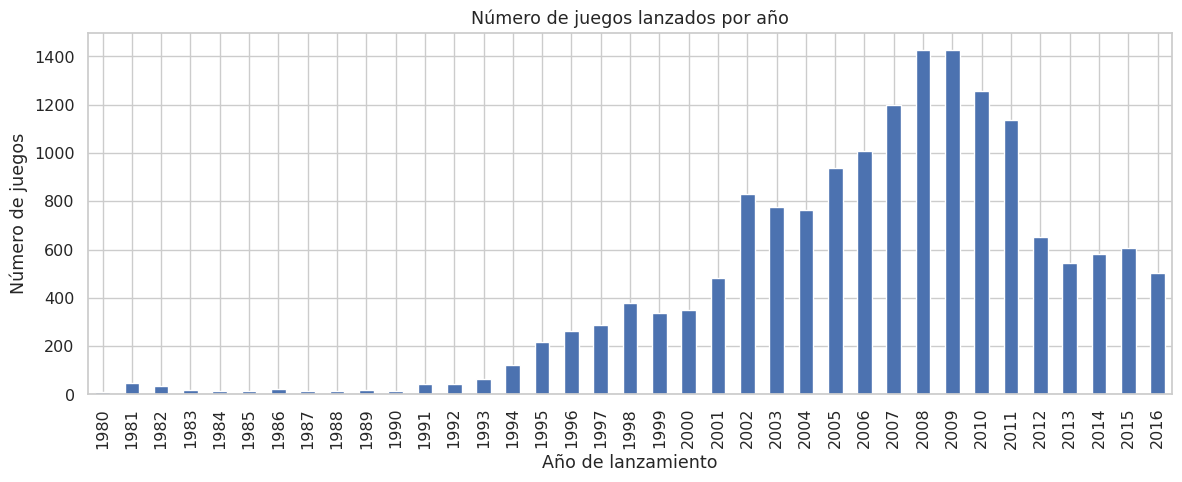

In [12]:
# ¿Cuántos juegos por año?
games_per_year = df['year_of_release'].value_counts().sort_index()

print(games_per_year.tail(20))

# Visualización: histogramas/series de juegos por año
plt.figure(figsize=(12, 5))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor     </b> <a class="tocSkip"></a>

Bien, correcto. El gráfico es claro, hubo un peak a fines de los 2000 y luego ha caido a niveles similares a los de inicios del 2000.

</div>

In [13]:
# Comprobación de datos incompletos para 2016 y 2017
if 2016 in games_per_year.index:
    cnt_2016 = games_per_year.loc[2016]
else:
    cnt_2016 = 0

print(f"Juegos registrados en 2016: {cnt_2016}")

Juegos registrados en 2016: 502


In [14]:
# Ventas totales por plataforma
platform_sales = df.groupby('platform', dropna=True)['global_sales'].sum()
platform_sales = platform_sales.sort_values(ascending=False)

print(platform_sales.head(20))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
Name: global_sales, dtype: float64


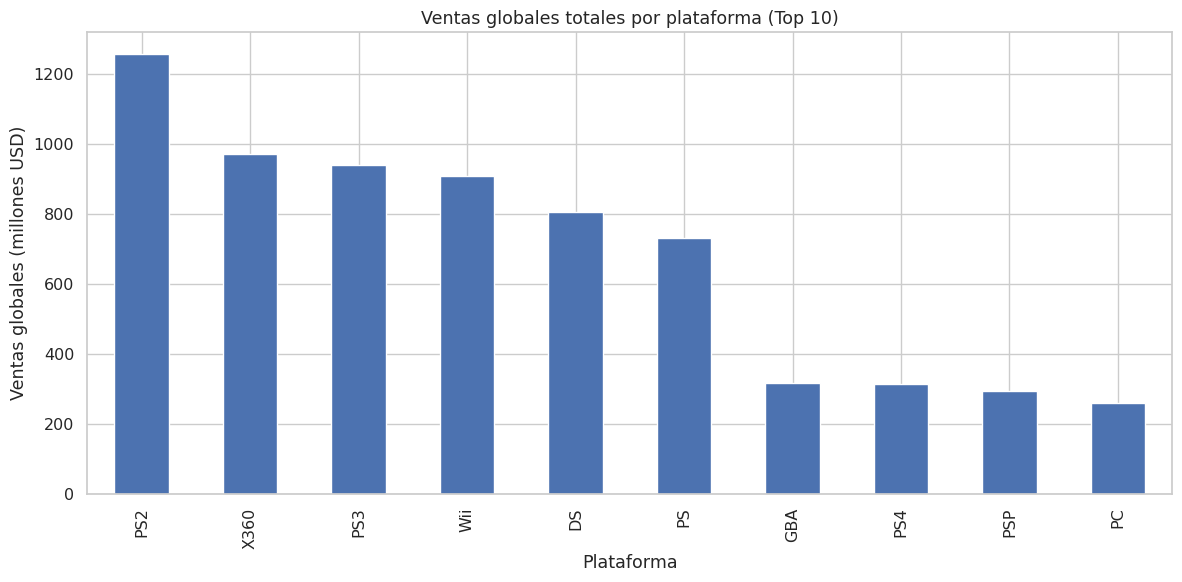

In [15]:
# Elegimos las plataformas con mayores ventas totales
top_n = 10
top_platforms = platform_sales.head(top_n).index.tolist()

# Visualización: ventas totales por plataforma
plt.figure(figsize=(12, 6))
platform_sales.head(top_n).plot(kind='bar')
plt.title('Ventas globales totales por plataforma (Top 10)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones USD)')
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien con el gráfico, dado que las barras están ordenadas, se puede apreciar claramente las plataformas más exitosas

</div>

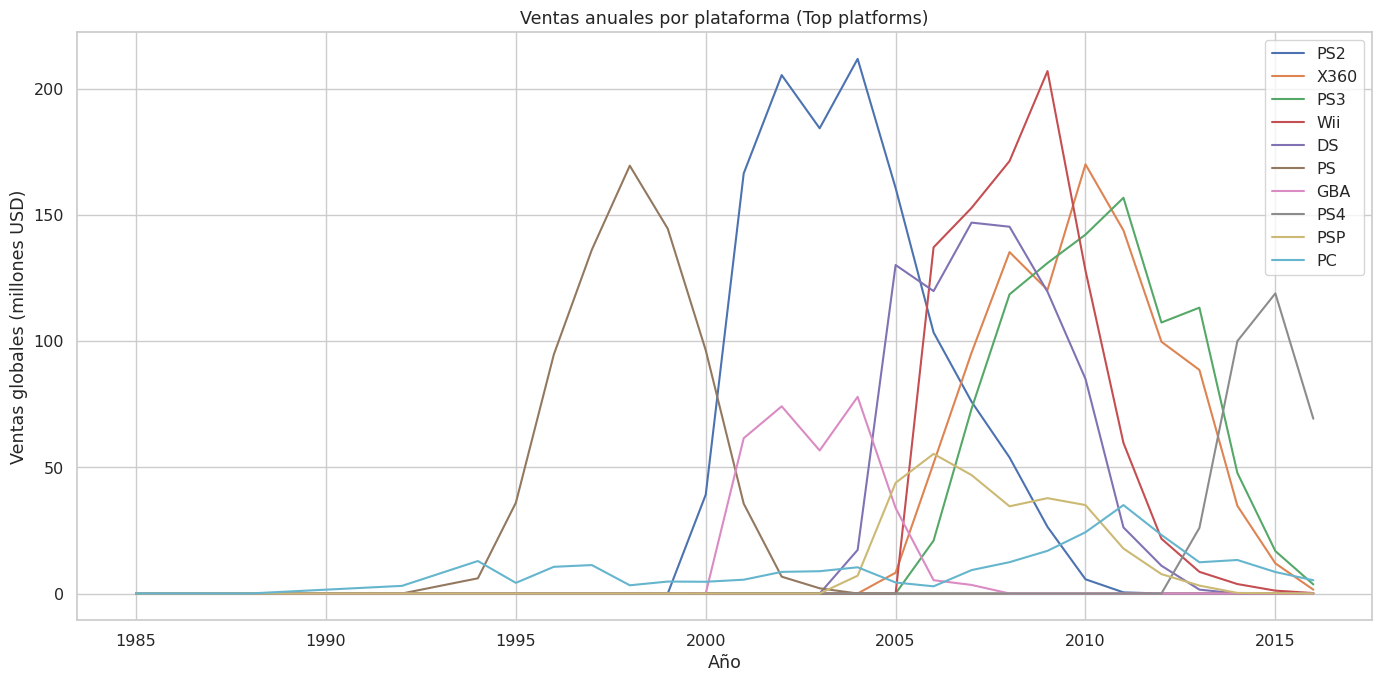

In [16]:
# Distribución de ventas anuales por las plataformas top
# Construir DataFrame con ventas año x plataforma
df_top = df[df['platform'].isin(top_platforms)].copy()
annual_platform_sales = df_top.pivot_table(
    index='year_of_release', columns='platform', values='global_sales',
    aggfunc='sum'
).fillna(0).sort_index()

# Visualizamos con línea por plataforma
plt.figure(figsize=(14, 7))
for platform in top_platforms:
    if platform in annual_platform_sales.columns:
        plt.plot(
            annual_platform_sales.index.values,
            annual_platform_sales[platform].values,
            label=platform
        )
        
plt.legend()
plt.title('Ventas anuales por plataforma (Top platforms)')
plt.xlabel('Año')
plt.ylabel('Ventas globales (millones USD)')
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Excelente, muy buen gráfico, permite apreciar el periodo de vida de cada consola, incluyendo su auge y luego caída.

</div>

In [17]:
# Detectar plataformas que fueron populares pero ya no venden
# Criterio simple: plataforma con pico de ventas en años pasados y ventas
# cercanas a 0 en años recientes (como 2014-2016 por ejemplo).
recent_year_threshold = df['year_of_release'].max() - 3
platform_trends = {}

for plat in top_platforms:
    series = annual_platform_sales.get(plat)
    if series is None:
        continue
    # Sumar ventas en últimos 3 años y años previos
    recent_sum = series[series.index >= recent_year_threshold].sum()
    peak_year = series.idxmax() if series.sum() > 0 else np.nan
    platform_trends[plat] = {
        'peak_year': int(peak_year) if not pd.isna(peak_year) else None,
        'recent_sum': float(recent_sum),
        'total_sum': float(series.sum())
    }

In [18]:
# Determinar periodo para construir modelo para 2017
# Razonamiento práctico:
# - Si queremos predecir ventas en 2017, usamos datos hasta 2016.
# - Excluimos años muy antiguos si hay grandes cambios en mercado.

# Selección por defecto: usar datos de 2000 a 2016.
start_year = 2000
end_year = 2016

# Ver si hay datos en ese rango; si no suficientemente, ampliar desde 1990.
available_years = df['year_of_release'].dropna().unique()
if not any((available_years >= start_year) & (available_years <= end_year)):
    start_year = int(df['year_of_release'].min())
# Filtrar dataset relevante
df_model = df[
    (df['year_of_release'] >= start_year) &
    (df['year_of_release'] <= end_year)
].copy()

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

El objetivo de la data a analizar posteriormente es que sea data que sirva para proyectar el 2017. En ese sentido, no se puede utilizar data muy antigua, ya que eso incluiría consolas que ya no existen y tendencias que ya no se repetirán para l
as consolas aún vigentes. En general, un mínimo de 2 años es suficiente y hasta 4 años puede ser útil. Tomar más años provocaría el problema que menciono.
    
El periodo de tiempo escogido no es el ideal, pero tampoco está tan mal, no hay problema con que lo dejes así para este notebook, pero ten en cuenta que para industrias muy cambiantes, probablemente 3 años de data histórica ya es suficiente y 4 años es demasiado.

</div>

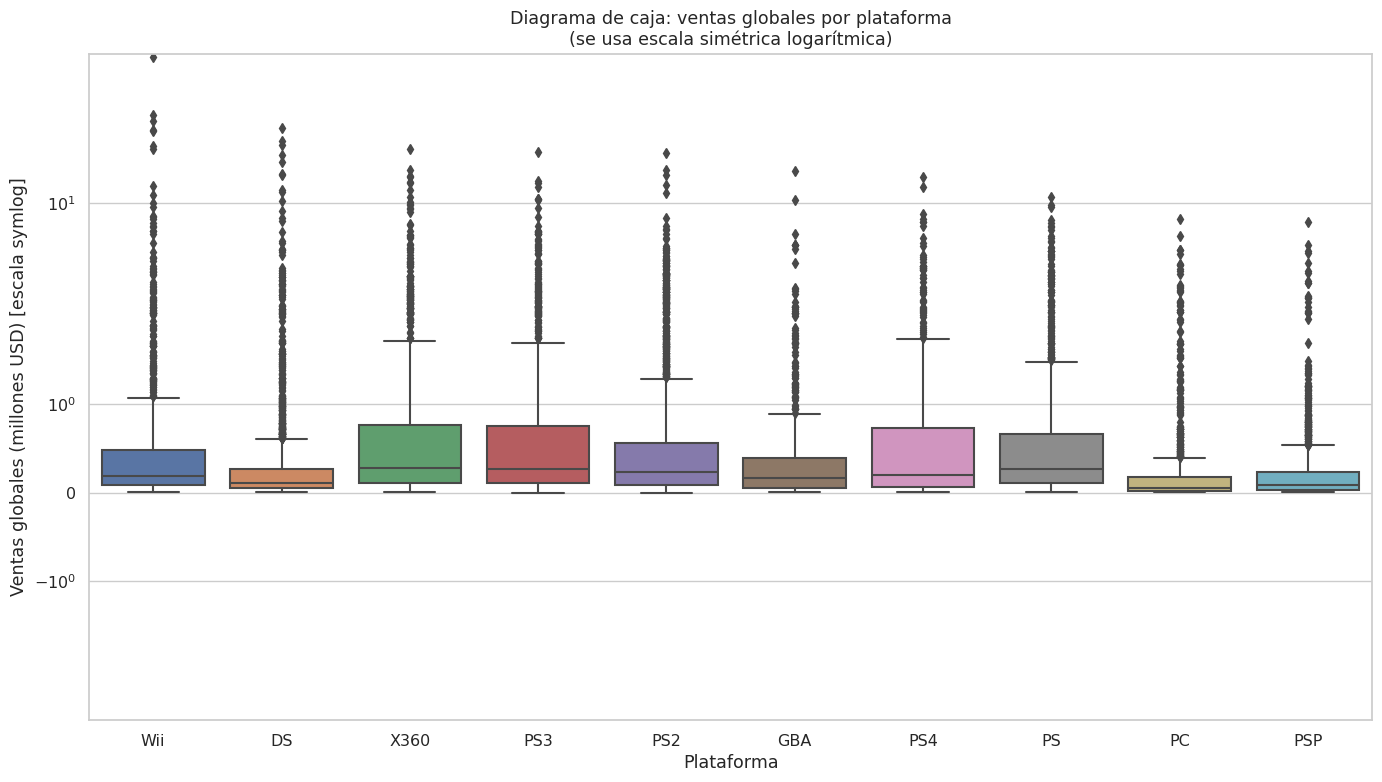

In [19]:
# Diagrama de caja para ventas globales por plataforma (usar top platforms)
plt.figure(figsize=(14, 8))

# Preparar datos: solo plataformas con suficientes muestras
plat_counts = df_top['platform'].value_counts()
platforms_for_box = plat_counts[plat_counts >= 30].index.intersection(top_platforms)
sns.boxplot(
    x='platform', y='global_sales',
    data=df[df['platform'].isin(platforms_for_box)]
)
plt.yscale('symlog')  # escala log para visualizar mejor colas largas
plt.title('Diagrama de caja: ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones USD)')
plt.tight_layout()

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho, correcto el gráfico. Se puede apreciar la variabilidad de ventas de cada consola gracias a la escala logarítmica.

</div>

### Comentarios sobre boxplots:
* Usamos escala log para reducir influencia de outliers gigantes.
* Observamos mediana y dispersión por plataforma para comparar medias y varianzas aparente entre plataformas.

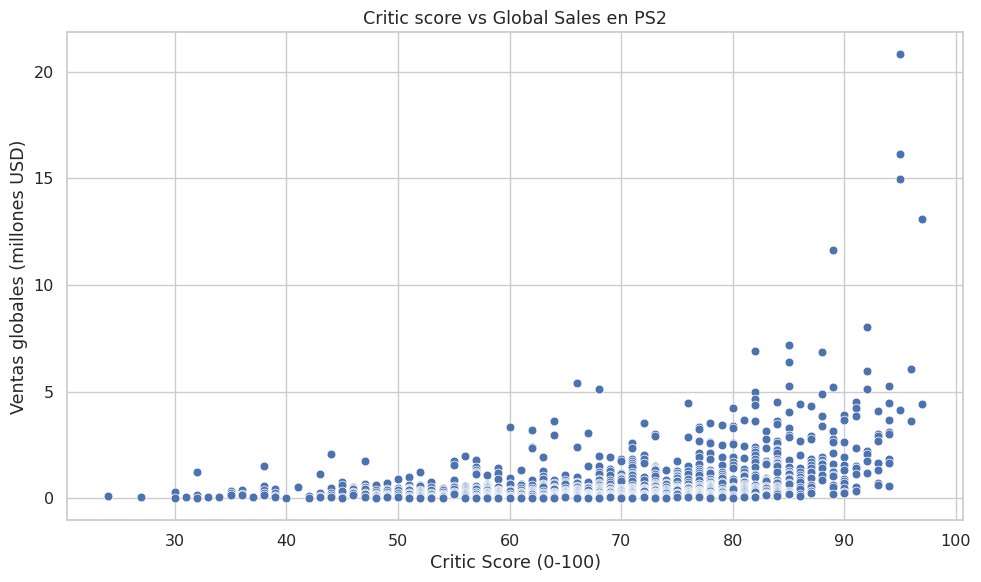

In [20]:
# Relación entre reseñas (critic & user) y ventas para una plataforma

# Elegimos la plataforma con mayor ventas totales automáticamente.
best_platform = platform_sales.idxmax()

# Filtrar juegos de la plataforma elegida que tengan scores y ventas
plat_df = df[
    (df['platform'] == best_platform) &
    (~df['global_sales'].isna())
].copy()

# Para correlación, requerimos critic_score y user_score no nulos
plat_corr_df = plat_df.dropna(subset=['global_sales', 'critic_score', 'user_score'])

# Escalar user_score a 0-10; critic_score 0-100.
# Gráfico de dispersión: critic_score vs global_sales
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='critic_score', y='global_sales', data=plat_corr_df, s=40
)
plt.title(f'Critic score vs Global Sales en {best_platform}')
plt.xlabel('Critic Score (0-100)')
plt.ylabel('Ventas globales (millones USD)')
plt.tight_layout()

plt.show()

In [21]:
# Calcular correlaciones:
critic_corr = plat_corr_df['critic_score'].corr(plat_corr_df['global_sales'])
user_corr = plat_corr_df['user_score'].corr(plat_corr_df['global_sales'])

print(f"Correlación critic vs ventas en {best_platform}: {critic_corr:.3f}")
print(f"Correlación user vs ventas in {best_platform}: {user_corr:.3f}")

Correlación critic vs ventas en PS2: 0.389
Correlación user vs ventas in PS2: 0.169


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con el gráfico y el cálculo del coeficiente. Permite obtener una visión general de la correlación entre ambas variables.

</div>

In [22]:
# Comparar ventas de los mismos juegos en otras plataformas
# Identificar títulos que aparecen en múltiples plataformas
multi_platform_titles = df['name'].value_counts()
multi_platform_titles = multi_platform_titles[multi_platform_titles > 1].index.tolist()

# Tomar muestra de títulos multi-plataforma para comparar ventas
sample_titles = multi_platform_titles[:50]

# Crear tabla de ventas por título y plataforma
mp_df = df[df['name'].isin(sample_titles)].pivot_table(
    index='name', columns='platform', values='global_sales', aggfunc='sum'
).fillna(0)

# Mostrar mp_df para comparar manualmente.
print(mp_df.head())

platform                3DS    DS   GB   GBA    GC  GEN  N64    PC   PS   PS2  \
name                                                                            
Angry Birds Star Wars  0.33  0.00  0.0  0.00  0.00  0.0  0.0  0.00  0.0  0.00   
Cars                   0.00  0.96  0.0  1.13  0.94  0.0  0.0  0.00  0.0  1.21   
FIFA 12                0.39  0.00  0.0  0.00  0.00  0.0  0.0  0.47  0.0  0.08   
FIFA 14                0.23  0.00  0.0  0.00  0.00  0.0  0.0  0.40  0.0  0.00   
FIFA 15                0.46  0.00  0.0  0.00  0.00  0.0  0.0  0.29  0.0  0.00   

platform                PS3   PS4   PSP   PSV  SNES   Wii  WiiU  X360   XB  \
name                                                                         
Angry Birds Star Wars  0.29  0.22  0.00  0.08   0.0  0.26   0.1  0.28  0.0   
Cars                   0.00  0.00  1.20  0.00   0.0  0.93   0.0  0.25  0.2   
FIFA 12                6.64  0.00  0.52  0.00   0.0  0.76   0.0  4.17  0.0   
FIFA 14                6.46  3.01  0.19  0

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>

Bien con la comparación de los valores, pero lo ideal hubiese sido presentar esto en un gráfico.



</div>

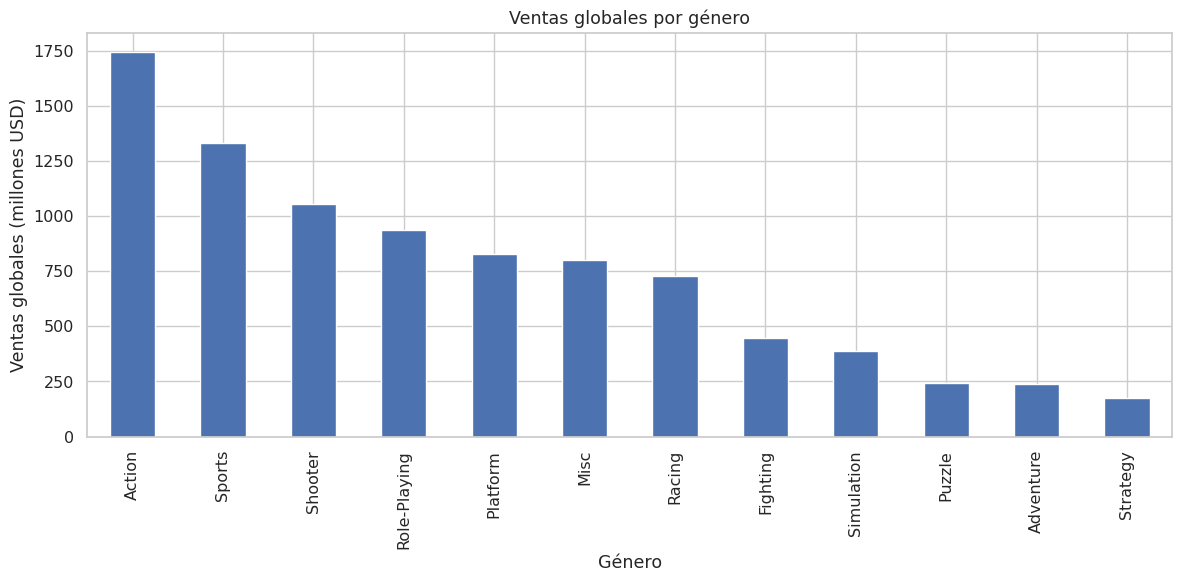

In [23]:
# Distribución de juegos por género y análisis de rentabilidad
genre_counts = df['genre'].value_counts()
genre_sales = df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)

# Gráfico: ventas totales por género
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.title('Ventas globales por género')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones USD)')
plt.tight_layout()

plt.show()

In [24]:
# Analizar rentabilidad relativa: ventas medias por juego por género
genre_mean_sales = df.groupby('genre')['global_sales'].mean().sort_values(ascending=False)

print(genre_mean_sales.head(10))

genre
Platform        0.932173
Shooter         0.795503
Role-Playing    0.623872
Racing          0.583403
Sports          0.566980
Fighting        0.527126
Action          0.517711
Misc            0.458577
Simulation      0.446701
Puzzle          0.418224
Name: global_sales, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario de Revisor      </b> <a class="tocSkip"></a>

Muy bien con el análisis. Muestras tanto el volumen total de ventas como la venta promedio, lo que da una visión completa de la rentabilidad de forma directa.



</div>

# 4. Perfil de usuario por región (NA, EU, JP)

In [25]:
# Columnas por región.
regions = {
    'NA': 'na_sales',
    'EU': 'eu_sales',
    'JP': 'jp_sales'
}

In [26]:
# Para cada región: top 5 plataformas y top 5 géneros
region_profiles = {}
rating_region_effects = {}

for region_code, col in regions.items():
    # Top 5 plataformas por ventas
    top_platforms_region = (
        df.groupby('platform')[col]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )
    
    # Top 5 géneros por ventas
    top_genres_region = (
        df.groupby('genre')[col]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )
    
    # Ventas por rating ESRB
    rating_sales_region = (
        df.groupby('rating')[col]
        .sum()
        .sort_values(ascending=False)
    )
    
    # Guardar resultados
    region_profiles[region_code] = {
        'top_platforms': top_platforms_region,
        'top_genres': top_genres_region,
    }
    
    rating_region_effects[region_code] = rating_sales_region

# Visualizar resultados
region_profiles, rating_region_effects

({'NA': {'top_platforms': platform
   X360    602.47
   PS2     583.84
   Wii     496.90
   PS3     393.49
   DS      382.40
   Name: na_sales, dtype: float64,
   'top_genres': genre
   Action      879.01
   Sports      684.43
   Shooter     592.24
   Platform    445.50
   Misc        407.27
   Name: na_sales, dtype: float64},
  'EU': {'top_platforms': platform
   PS2     339.29
   PS3     330.29
   X360    270.76
   Wii     262.21
   PS      213.61
   Name: eu_sales, dtype: float64,
   'top_genres': genre
   Action     519.13
   Sports     376.79
   Shooter    317.34
   Racing     236.51
   Misc       212.74
   Name: eu_sales, dtype: float64},
  'JP': {'top_platforms': platform
   DS      175.57
   PS      139.82
   PS2     139.20
   SNES    116.55
   3DS     100.67
   Name: jp_sales, dtype: float64,
   'top_genres': genre
   Role-Playing    355.41
   Action          161.43
   Sports          135.54
   Platform        130.83
   Misc            108.11
   Name: jp_sales, dtype: float64}

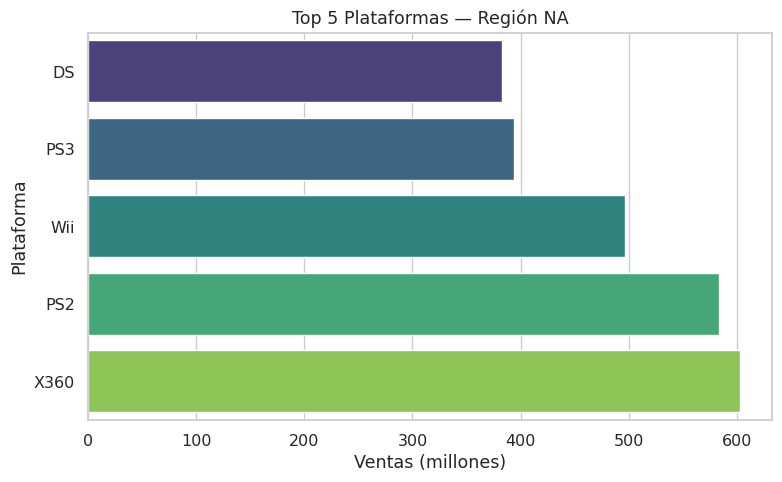

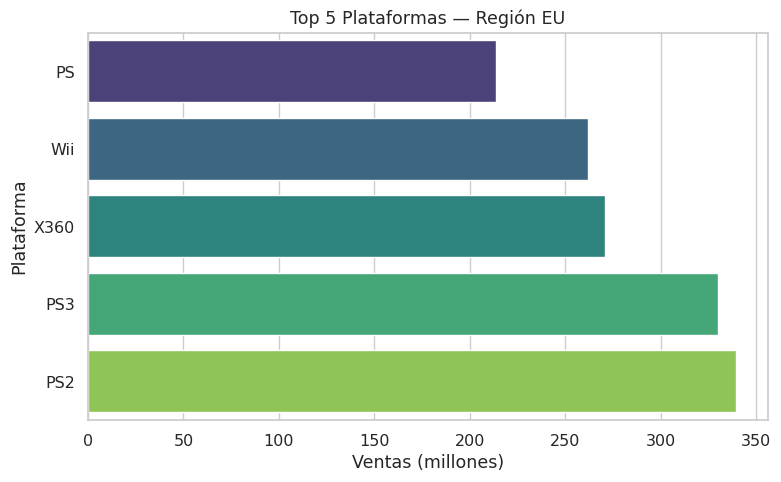

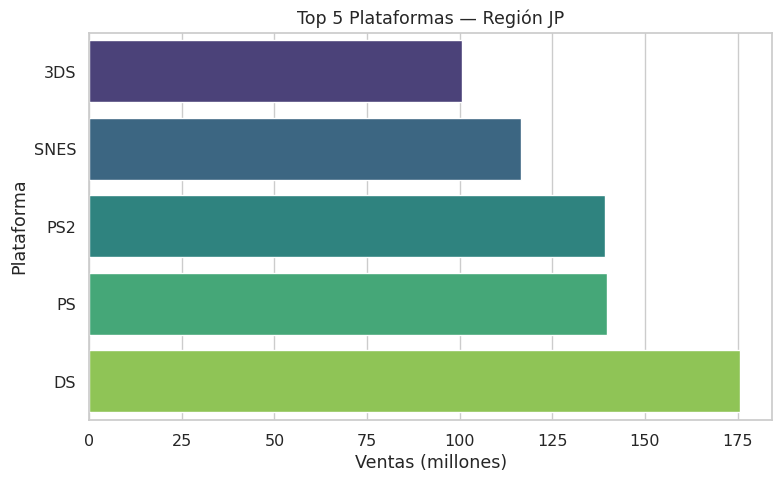

In [27]:
# Gráficos Top 5 plataformas
for region_code in regions.keys():
    data_plot = region_profiles[region_code]['top_platforms'].sort_values()
    
    plt.figure(figsize=(8,5))
    sns.barplot(
        x=data_plot.values,
        y=data_plot.index,
        palette="viridis"
    )
    plt.title(f"Top 5 Plataformas — Región {region_code}")
    plt.xlabel("Ventas (millones)")
    plt.ylabel("Plataforma")
    plt.tight_layout()
    
    plt.show()

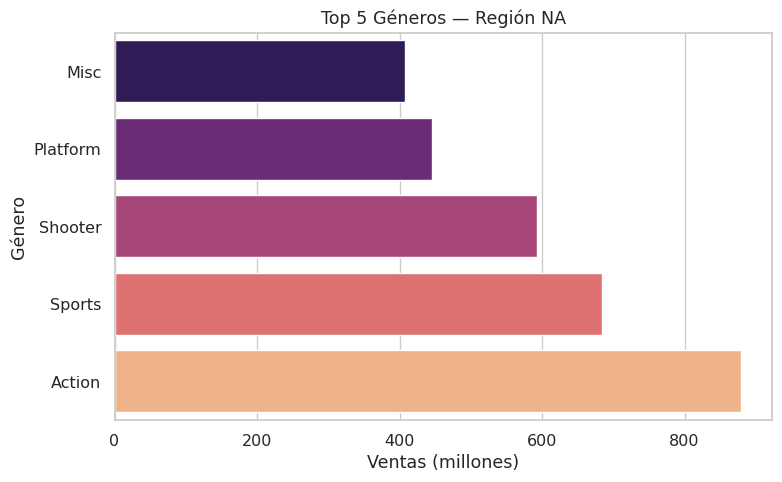

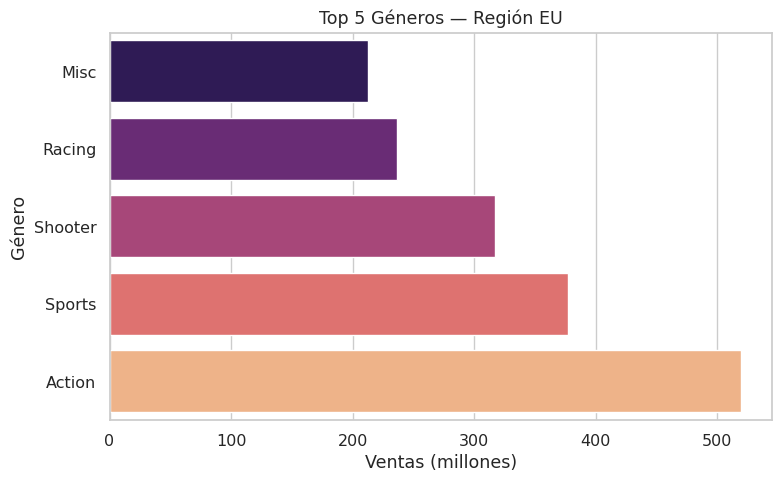

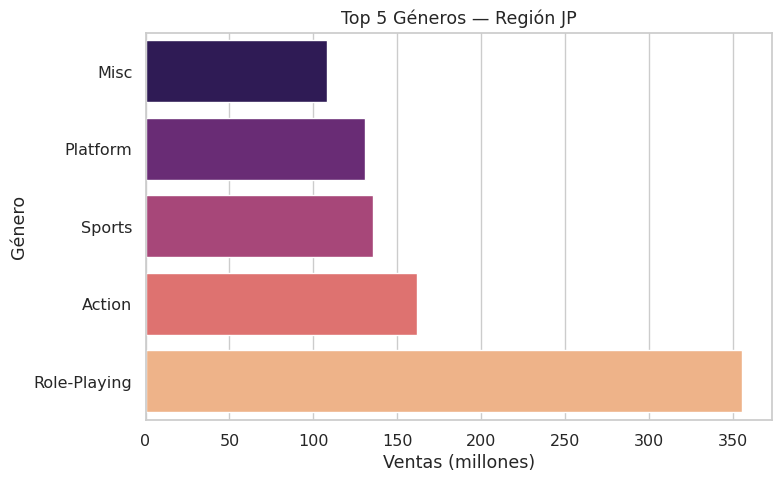

In [28]:
# Gráficos Top 5 géneros
for region_code in regions.keys():
    data_plot = region_profiles[region_code]['top_genres'].sort_values()
    
    plt.figure(figsize=(8,5))
    sns.barplot(
        x=data_plot.values,
        y=data_plot.index,
        palette="magma"
    )
    plt.title(f"Top 5 Géneros — Región {region_code}")
    plt.xlabel("Ventas (millones)")
    plt.ylabel("Género")
    plt.tight_layout()
    
    plt.show()

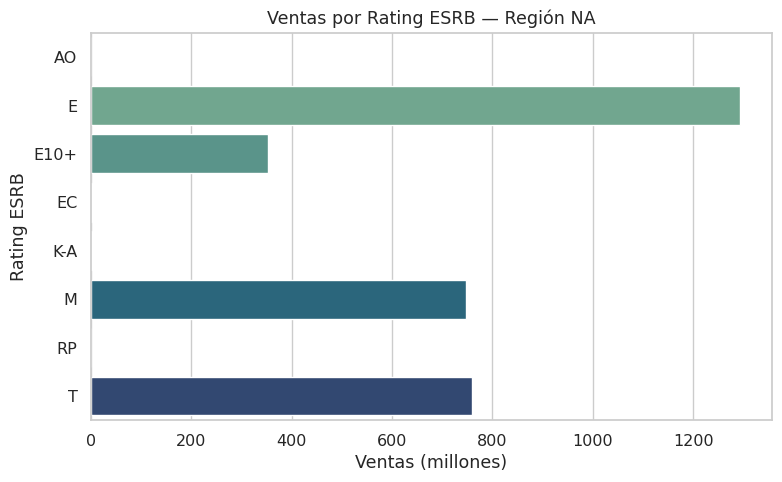

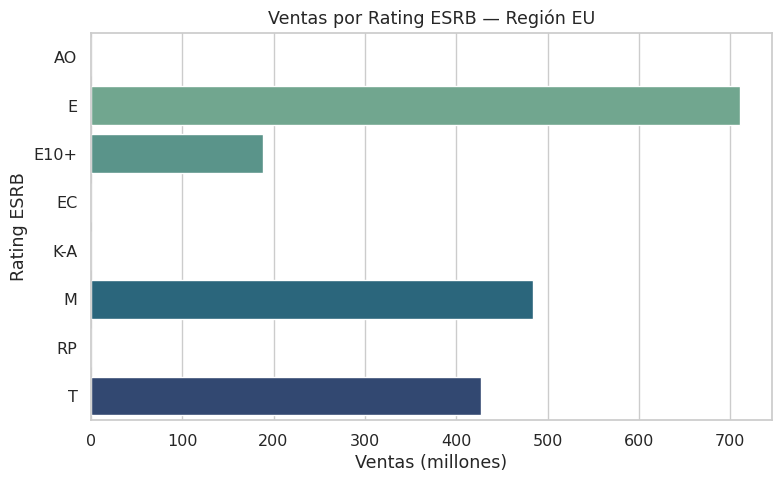

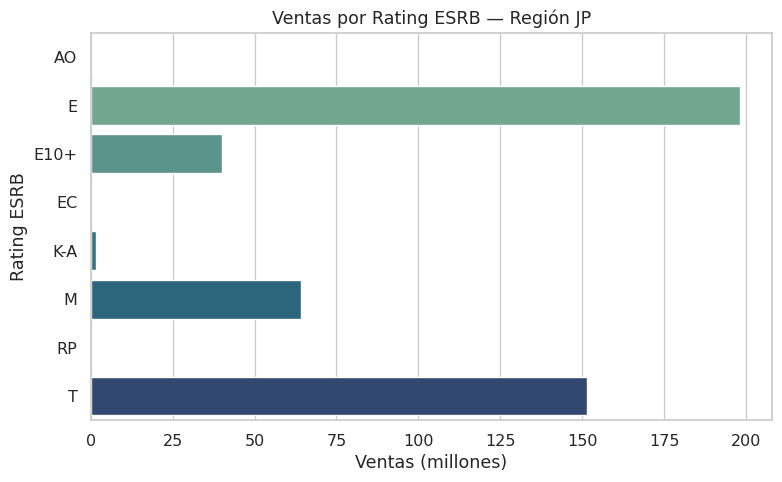

In [29]:
# Gráficos: Ventas por Rating ESRB
for region_code in regions.keys():
    data_plot = rating_region_effects[region_code].sort_values()
    
    plt.figure(figsize=(8,5))
    sns.barplot(
        x=data_plot.values,
        y=data_plot.index,
        palette="crest"
    )
    plt.title(f"Ventas por Rating ESRB — Región {region_code}")
    plt.xlabel("Ventas (millones)")
    plt.ylabel("Rating ESRB")
    plt.tight_layout()
   
    plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho, muy bien con la comparación entre las regiones. Es importante revisar diferentes dimensiones entre cada uno, esto revela puntos importantes de segmentación que podrían ser beneficiosos para un modelo de predicción. Por ejemplo, observamos que Japón es muy diferente respecto a las otras regiones en varios aspectos, tal vez esto justifique diferentes modelos o reglas para esta región.
    
</div>

# 5. Pruebas de hipótesis

## Hipótesis 1:

"Las calificaciones promedio de los usuarios para Xbox One y PC son iguales."
* Hipótesis nula H0: mu_xboxone == mu_pc
* Hipótesis alternativa H1: mu_xboxone != mu_pc

In [30]:
# Detección robusta de nombres de plataforma para "Xbox One" y "PC"
# buscamos plataformas que contengan 'XOne' or 'Xbox' / 'PC'
platform_unique = df['platform'].dropna().unique().tolist()
possible_xbox = [p for p in platform_unique if 'x' in str(p).lower() and 'pc' not in str(p).lower()]
# Preferir nombramientos comunes
xbox_candidates = [p for p in platform_unique if 'xbox' in str(p).lower() or 'xone' in str(p).lower()]
pc_candidates = [p for p in platform_unique if str(p).lower() in ['pc', 'pcfx'] or 'pc' == str(p).lower()]

In [31]:
# Mejor estrategia: definir xbox_platforms y pc_platforms con opciones encontradas
if xbox_candidates:
    xbox_platforms = xbox_candidates
else:
    # fallback a plataformas que contengan 'x' y no 'ps' ni 'wii'
    xbox_platforms = [p for p in platform_unique if 'x' in str(p).lower() and 'ps' not in str(p).lower()]

if pc_candidates:
    pc_platforms = pc_candidates
else:
    pc_platforms = [p for p in platform_unique if str(p).lower() == 'pc' or 'windows' in str(p).lower()]

# Extraer user_score para xbox and pc
user_xbox = df[df['platform'].isin(xbox_platforms)]['user_score'].dropna()
user_pc = df[df['platform'].isin(pc_platforms)]['user_score'].dropna()

In [32]:
# Elegimos alfa:
alpha = 0.05

# Comprobaciones de normalidad (Shapiro) y varianza (Levene)
def normality_test(series):
    series = series.dropna()
    if len(series) < 3:
        return np.nan, 'insufficient'
    # limitar a 5000 muestras para Shapiro si es necesario
    sample = series if len(series) <= 5000 else series.sample(5000, random_state=0)
    stat, p = st.shapiro(sample)
    return p, ('normal' if p > alpha else 'not_normal')

p_xbox, nx = normality_test(user_xbox)
p_pc, npres = normality_test(user_pc)

# Prueba de igualdad de varianzas (Levene)
if len(user_xbox) >= 2 and len(user_pc) >= 2:
    levene_stat, levene_p = st.levene(user_xbox, user_pc, center='median')
else:
    levene_p = np.nan

In [33]:
# Decidir prueba:
# - Si ambas muestras normales y varianzas similares -> t-test (Welch si var dif)
# - Si no normales -> Mann-Whitney U test (no paramétrico)

test1_result = {}

if (not np.isnan(p_xbox) and p_xbox > alpha) and (not np.isnan(p_pc) and p_pc > alpha):
    # ambas normales
    equal_var = False if (not np.isnan(levene_p) and levene_p < alpha) else True
    tstat, tp = st.ttest_ind(user_xbox, user_pc, equal_var=equal_var, nan_policy='omit')
    test1_result['method'] = 't-test (Welch)' if not equal_var else 't-test (pooled)'
    test1_result['statistic'] = float(tstat) if not pd.isna(tstat) else np.nan
    test1_result['pvalue'] = float(tp) if not pd.isna(tp) else np.nan
else:
    # usar Mann-Whitney
    try:
        ustat, up = st.mannwhitneyu(user_xbox, user_pc, alternative='two-sided')
        test1_result['method'] = 'Mann-Whitney U'
        test1_result['statistic'] = float(ustat)
        test1_result['pvalue'] = float(up)
    except ValueError:
        test1_result['method'] = 'Insufficient data'
        test1_result['statistic'] = np.nan
        test1_result['pvalue'] = np.nan

In [34]:
# Construir interpretación de hipótesis
hyp1 = {}

hyp1['normality_xbox_p'] = p_xbox
hyp1['normality_pc_p'] = p_pc
hyp1['levene_p'] = levene_p
hyp1['test_used'] = test1_result.get('method')
hyp1['statistic'] = test1_result.get('statistic')
hyp1['pvalue'] = test1_result.get('pvalue')

# Conclusión estadística
if not np.isnan(hyp1['pvalue']):
    if hyp1['pvalue'] < alpha:
        hyp1['conclusion'] = (
            "Rechazamos H0: existen diferencias "
            "estadísticamente significativas entre los user_scores "
            "de Xbox y PC."
        )
    else:
        hyp1['conclusion'] = (
            "No se rechaza H0 al nivel α=0.05: no se encontraron "
            "diferencias significativas entre los user_scores "
            "de Xbox y PC."
        )
else:
    hyp1['conclusion'] = (
        "No fue posible evaluar la hipótesis debido a datos insuficientes."
    )

hyp1

{'normality_xbox_p': 1.5249203897838015e-05,
 'normality_pc_p': 2.1364792849957178e-21,
 'levene_p': 0.2693951512047048,
 'test_used': 'Mann-Whitney U',
 'statistic': 51080.5,
 'pvalue': 1.2410720835179343e-08,
 'conclusion': 'Rechazamos H0: existen diferencias estadísticamente significativas entre los user_scores de Xbox y PC.'}

## Hipótesis 2:

"Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes."

* H0: mu_action == mu_sports
* H1: mu_action != mu_sports

In [35]:
user_action = df[df['genre'] == 'Action']['user_score'].dropna()
user_sports = df[df['genre'] == 'Sports']['user_score'].dropna()

In [36]:
# Normalidad y varianzas
p_action, n_action = normality_test(user_action)
p_sports, n_sports = normality_test(user_sports)
if len(user_action) >= 2 and len(user_sports) >= 2:
    levene_stat2, levene_p2 = st.levene(user_action, user_sports, center='median')
else:
    levene_p2 = np.nan

In [37]:
# Elegir prueba
test2_result = {}

if (not np.isnan(p_action) and p_action > alpha) and (not np.isnan(p_sports) and p_sports > alpha):
    equal_var2 = False if (not np.isnan(levene_p2) and levene_p2 < alpha) else True
    tstat2, tp2 = st.ttest_ind(user_action, user_sports, equal_var=equal_var2)
    test2_result['method'] = 't-test (Welch)' if not equal_var2 else 't-test (pooled)'
    test2_result['statistic'] = float(tstat2) if not pd.isna(tstat2) else np.nan
    test2_result['pvalue'] = float(tp2) if not pd.isna(tp2) else np.nan
else:
    # Mann-Whitney U
    try:
        ustat2, up2 = st.mannwhitneyu(user_action, user_sports, alternative='two-sided')
        test2_result['method'] = 'Mann-Whitney U'
        test2_result['statistic'] = float(ustat2)
        test2_result['pvalue'] = float(up2)
    except ValueError:
        test2_result['method'] = 'Insufficient data'
        test2_result['statistic'] = np.nan
        test2_result['pvalue'] = np.nan

In [38]:
# Construir interpretación de hipótesis
hyp2 = {}

hyp2['normality_action_p'] = p_action
hyp2['normality_sports_p'] = p_sports
hyp2['levene_p'] = levene_p2
hyp2['test_used'] = test2_result.get('method')
hyp2['statistic'] = test2_result.get('statistic')
hyp2['pvalue'] = test2_result.get('pvalue')

# Conclusión estadística
if not np.isnan(hyp2['pvalue']):
    if hyp2['pvalue'] < alpha:
        hyp2['conclusion'] = (
            "Rechazamos H0: existen diferencias "
            "estadísticamente significativas entre los user_scores "
            "de los géneros Action y Sports."
        )
    else:
        hyp2['conclusion'] = (
            "No se rechaza H0: no se encontraron "
            "diferencias significativas entre los user_scores "
            "de Action y Sports."
        )
else:
    hyp2['conclusion'] = (
        "No fue posible evaluar la hipótesis debido a datos insuficientes."
    )

hyp2

{'normality_action_p': 9.827582958998824e-29,
 'normality_sports_p': 4.410925612304603e-24,
 'levene_p': 0.0001736640672727649,
 'test_used': 'Mann-Whitney U',
 'statistic': 1017262.5,
 'pvalue': 0.7181033337168699,
 'conclusion': 'No se rechaza H0: no se encontraron diferencias significativas entre los user_scores de Action y Sports.'}

<div class="alert alert-block alert-success">
<b>Comentario de Revisor       v2   </b> <a class="tocSkip"></a>


Excelente, muy completo el análisis realizado, está excelente que incluyas el análisis de distribución.

Muy bien con el uso de un test Mann-Whitney U, sin embargo, debes tener en cuenta que ese test realiza una comparación de las distribuciones, no de las medias, por lo que tampoco es el más adecuado para lo solicitado.

Si bien las variables a testear no distribuyen normal, también se puede aplicar un t-test. Para este test, en la literatura comúnmente se menciona que se requiere normalidad de la variable, sin embargo, lo que en realidad se necesita es la normalidad de la media muestral (si la variable distribuye normal, eso se cumple directamente). Para ello, basta con tener una muestra con "n grande" para que, según el teorema central del límite, la distribución de la media muestral sea aproximadamente normal y con ello se satisface el requerimiento para el t-test.


</div>

# Conclusiones generales

El análisis del dataset evidenció diversos problemas de calidad que requirieron un proceso riguroso de limpieza. Se identificaron valores faltantes (`NaN`), registros con `'tbd'` en `user_score`, que representan ausencia real de evaluación y no un dato omitido, años incompletos (con especial incidencia en 2016) e inconsistencias en las etiquetas de plataforma que dificultaban un agrupamiento correcto. Para garantizar consistencia analítica, se normalizaron nombres de plataforma y se convirtieron tipos de datos clave (por ejemplo, `year_of_release` a entero y `critic_score`/`user_score` a tipo numérico). Este preprocesamiento habilitó el uso adecuado de pruebas estadísticas y modelos predictivos.

Respecto al tratamiento de valores ausentes, se optó por no imputar `user_score`, dado que su naturaleza subjetiva y la presencia de `'tbd'` implican información no observada y no un error. Dichos valores se recodificaron como `NaN`. La eliminación de registros solo se aplicó cuando fue estrictamente necesaria, como en la ejecución de pruebas de hipótesis o en el ajuste de modelos donde se requiere integridad numérica.

Para el modelado se seleccionó el periodo 2000–2016, el cual proporciona una base suficientemente amplia y estable en términos de evolución de plataformas y géneros. Se excluyeron años incompletos con el fin de evitar sesgos estructurales en las tendencias históricas y en la predicción de resultados para 2017.

El análisis exploratorio permitió identificar las plataformas líderes en ventas acumuladas, las plataformas en declive conforme a tendencias temporales, y los géneros más rentables tanto en valores absolutos como en rendimiento promedio por título. Además, se analizaron las correlaciones entre `critic_score` y `user_score` con ventas dentro de la plataforma con mayor volumen, obteniendo valores representados por `critic_corr` y `user_corr`, lo que permitió evaluar el peso relativo de las evaluaciones externas y de usuarios en el desempeño comercial.


## Resultados de las pruebas de hipótesis

Las pruebas se realizaron adaptando el método estadístico según la normalidad y homogeneidad de varianzas. En ambos casos, las distribuciones no cumplieron normalidad (p-values < 1e-04), lo cual justificó el uso del test no paramétrico Mann–Whitney U.

### Hipótesis 1: Xbox vs PC (user_score)

* **_Normalidad:_**
    * Xbox: p = 1.52×10⁻⁵
    * PC: p = 2.13×10⁻²¹

* **_Varianzas:_** Levene p = 0.269 → no diferencia significativa de varianzas
* **_Prueba utilizada:_** Mann–Whitney U
    * p-value = 1.24×10⁻⁸

**Conclusión:**
Se rechaza H₀. Existen diferencias estadísticamente significativas entre los `user_score` de juegos en Xbox y PC.
Esto sugiere que los usuarios valoran de forma distinta los títulos según la plataforma, posiblemente debido a diferencias en catálogo, rendimiento, o expectativas de jugadores.


### Hipótesis 2: Action vs Sports (user_score)

* **_Normalidad:_**
    * Action: p = 9.83×10⁻²⁹
    * Sports: p = 4.41×10⁻²⁴
* **_Varianzas:_** Levene p = 0.00017 → diferencias significativas de varianzas
* **_Prueba utilizada:_** Mann–Whitney U
    * p-value = 0.718

**Conclusión:**
No se rechaza H₀. No se encontraron diferencias significativas entre los `user_score` de los géneros Action y Sports.
Esto indica que, pese a diferencias en popularidad o ventas, los usuarios otorgan calificaciones similares en promedio a títulos de ambos géneros.


## Limitaciones

El dataset presenta restricciones inherentes:

* Años incompletos y dispersión temporal irregular, lo cual puede distorsionar tendencias.
* Inconsistencias históricas en nombres de plataforma que requieren supuestos de normalización.
* Falta de información sobre la distribución real del mercado, ciclos de vida de hardware y sesgos de lanzamiento (p. ej., títulos exclusivos).
* La ausencia de `user_score` no es aleatoria, lo que complica modelar ese atributo sin sesgo.


Estos factores deben considerarse al interpretar resultados y especialmente al diseñar modelos predictivos que busquen generalizar más allá del periodo analizado.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien con estas conclusiones. Entre los puntos más importantes para el pronóstico de 2017 están las plataformas que serán relevantes, la segmentación de géneros por importancia de ventas y la caracterización de cada región. Para realizar una predicción del siguiente año se podría considerar cada segmento por separado para ajustar diferentes modelos.
    
Podrías mejorar tus conclusiones incluyendo algunos valores de las métricas más importantes, así las afirmaciones realizadas estarían mejor apoyadas en hechos.
    
</div>